In [10]:
#LIBRARIES
import pandas as pd
import re
import numpy as np
from tqdm import tqdm
import math 
## FUZZY
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

## nomalice parameters
from unidecode import unidecode

import spacy  # For preprocessing
from scipy import spatial
from time import time  # To time our operations
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pylab as P

In [11]:
DF_JOB_H = pd.read_excel("data_base_VF.xlsx")


In [12]:
DF_JOB_H["job_history_clean"]
def isNaN(testS):
    return not type(testS) == str and  math.isnan(testS)==True
def convertInt(stringIn):
    try:
        return int(stringIn)
    except ValueError:
        print("error int", stringIn)
        return 2021

In [13]:
isNaN("10")

False

In [14]:
## object maker
def stringToObject(DataFrame):
    #SEPARANDO LOS STRINGS DE CADA TRABAJO

    L = []

    for i in DataFrame.job_history_clean:
        l = str(i).split("},") #convertir en string el job history del individuo y crear lista para separar cada formación
        k = [] #Lista donde se almacenara cada formación x del individuo i
        for job in l: #para cada trabajo
            job = job.replace("[", "").replace("]", "") + "}" #separelos y conviertalas en diccionarios
            k.append(job) #añadalas a la lista de jobs
        L.append(k) 
    #EXTRAER DE MANERA ORDENADA EL JOB HISTORY, LA FECHA DE TERMINACIÓN Y COMIENZO
    K = [] 

    for individuo in tqdm(L): 

        educacion_ind = [] 

        for ins in individuo: 
            print(ins, type(ins))
            ins = ins.replace('"', "'")

            c = {}

            #EXTRAER JOB-TITLE
            if ( len(re.findall("'job_title': '.*?'", ins)) ) > 0:
                c["job_title"] =  re.findall("'job_title': '.*?'", ins)[0].replace("'job_title': ", "").replace("'", "")
                c["job_title"] = str(c["job_title"])
                # c["job_title"] = cleaning(c["job_title"])

            #EXTRAER INICIO
            if ( len(re.findall("'start': '.*?'", ins)) ) > 0:
                c["start"] = re.findall("'start': '.*?'", ins)[0].replace("'start': ", "").replace("'", "")
                c["start"] = convertInt(c["start"][::-1][0:4][::-1]) #SOLO CONSERVAR EL AÑO 

            #EXTRAER FINALIZACIÓN
            if ( len(re.findall("'end': '.*?'", ins)) ) > 0:
                c["end"] = re.findall("'end': '.*?'", ins)[0].replace("'end': ", "").replace("'", "")
                c["end"] = convertInt(c["end"][::-1][0:4][::-1]) #SOLO CONSERVAR EL AÑO

            educacion_ind.append(c) #añado cada formación a la lista de sus educaciones

        K.append(educacion_ind) #añado la educación de cada individuo a una lista general
    return K

    

In [15]:
result = stringToObject(DF_JOB_H)
print(result[0])


r'>
 {'job_title': ' director education', 'start': '2014', 'end': '2015'} <class 'str'>
 {'job_title': ' co founder', 'start': '2013', 'end': '2014'} <class 'str'>
 {'job_title': ' teacher', 'start': '2012', 'end': '2013'} <class 'str'>
 {'job_title': ' research assistant', 'start': '2011', 'end': '2012'}} <class 'str'>
{'job_title': ' software engineering technical manager', 'start': '2021', 'end': 'idad'} <class 'str'>
error int idad
 {'job_title': ' software engineer', 'start': '2021', 'end': 'idad'} <class 'str'>
error int idad
 {'job_title': ' software engineer', 'start': '2020', 'end': '2020'} <class 'str'>
 {'job_title': ' senior software engineer technical lead remote contractor', 'start': '2020', 'end': '2020'} <class 'str'>
 {'job_title': ' software developer', 'start': '2019', 'end': '2020'} <class 'str'>
 {'job_title': ' desarrollador stack remote contractor', 'start': '2018', 'end': '2019'} <class 'str'>
 {'job_title': ' web developer', 'start': '2017', 'end': '2018'} <cla

In [16]:
type(result[0][0]["start"])

int

In [7]:
len(result)

389

In [17]:

embeddings_dict = {}
# vectors dimention
DIMENTION_DIC = 300
# 6 billions words
#with open("glove.6B."+str(DIMENTION_DIC)+"d.txt", 'r', encoding="utf-8") as f:
# 42 Billion words
with open("glove.42B."+str(DIMENTION_DIC)+"d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        print(word)
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

        

ney/redi-meds
stalwartuk
st-amant
stamp-size
stanchorage
s.t.a.n.d.
standord
starfox64
starle
starmind
star-san
starselite
starsports
starspow
starsshineonme
start/continue
start.html
starthtml
star-type
starvox
starwagon
stasso
state10
statec
statementlicense
state.now
state-reported
states10/10/2012
statesquick
statesthere
states.washington
state_type
stateview
stathams
station/bryan
stationthis
statkevich
statsanswersboardvideos
statti
stay-awake
staybeautiful
stboise
std100
stduluth
steamfunk
steapon
steece
steelers/ravens
steelroots
stefanibags.com
steinhour
stellenbosh
step.if
stepkother
stepo
stepsjoincontact
step-step
stepups
steri-fab
sterioids
sterlinglogin
sternn
steroided
stevn
stgc
sthd
stnto
stock11
stock.estimated
stockfinster
stockholme
stockpickers
stockpiler
stocks.com
stockwarning
stocs
stokeham
stoke-on
stolder
stommelen
stone-covered
stooop
stopgame
stop/limit
storandt
storesbusinesses
stormclan
störmer
storm-relative
storyfebruary
story?follow
storywriters
stossel

In [18]:
## ordena la spalabras dependiendo de la distancia euclidiana en el n-space
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

## method to get word/vector from dictionary
def getVectorWord(dictionary, word):
    if word in dictionary:
        return dictionary[word]
    else :
        return np.zeros(DIMENTION_DIC)


In [10]:
DF_JOB_H["end_boot"][200]

2015

In [19]:
## tranform profiles to vectors
profilesVectors = []
profilesVectorPlain = []
for index in range(0,len(result)):
    job_history_prof = result[index]
    boot_year = DF_JOB_H["end_boot"][index]
    boot_year = int(boot_year) if not type(boot_year) ==str  and not math.isnan(boot_year)  else float("nan")
    total_jobs = len(job_history_prof)
    job_vectors = []
    print(type(boot_year)== str,boot_year, )
    for i in range(0,total_jobs):
        if "start" in job_history_prof[i] and "job_title" in job_history_prof[i] and boot_year and not math.isnan(boot_year) and not type(boot_year) ==str and job_history_prof[i]["start"]>=int(boot_year):
            
            job_title = job_history_prof[i]["job_title"]
            print(job_title,len(job_title))
            nVectors = [np.zeros(DIMENTION_DIC)]
            if len(job_title) > 0:
                nVectors  = [ getVectorWord(embeddings_dict,word) for word in job_title.split()]
            sumVector = np.add.reduce(nVectors)
            job_vectors.append(sumVector)
            profilesVectorPlain.append(sumVector)
        else:
            profilesVectorPlain.append(np.zeros(DIMENTION_DIC))
            job_vectors.append(None)
    profilesVectors.append(job_vectors)



False 2021
 business development representative 36
 business development representative 36
False nan
False 2019
 talent acquisition regional planning 37
 people analytic consultant amp workshop facilitator 52
False 2021
False 2023
False 2023
False 2022
False 2020
 datum analyst 14
False 2019
False 2021
False 2020
 product development amp innovation manager 43
 lead data scientist 20
False 2023
False 2020
 ux ui designer 15
False 2017
 co founder amp director 24
False 2018
 growth marketing manager 25
 performance marketing manager freelancer 41
 general management 19
 consultant working student 27
 digital marketing amp crm internship 37
 market garnier fructis argentina work student 46
False 2018
 marketing automation strategist 32
 catalog wizard 15
False 2019
 ssr datum analyst etl developer 32
 datum analyst 14
False 2021
 non commission revenue analyst 31
False 2019
 southern cone product manager 30
False 2019
 stack engineer 15
False 2019
 business analytic supervisor 29
 busines

In [12]:
len(profilesVectorPlain[0])

300

In [20]:
## number of words needed to pass
MIN_COUNT = 2
## validates if is word related
def validator(relatedWords, words):
    isRelated = False
    count = 0
    for word in words:
        if word in relatedWords:
            count+=1
        if count >= MIN_COUNT: 
            return True
    if count >= MIN_COUNT: 
        return True
    else:
        return False

 


In [14]:
print(find_closest_embeddings(profilesVectorPlain[1])[:9])

['4/0m', 'accesoriespopup', '1243map', '765.361.6100', 'drift.night', 'http://images.samsung.com/is/image/', 'http://images.samsung.com/is/', '12345678910111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989910010110210310410510610710810911011111211311411511611711811912012112212312412512612712812913013113213313413513613713813914014114214314414514614714814915015115215315415515615715815916016116216316416516616716816917017117217317417517617717817918018118218318418518618718818919019119219319419519619719819920020120220320420520620720820921021121221321421521621721821922022122222322422522622722822923023123223323423523623723823924024124224324424524624724824925025125225325425525625725825926026126226326426526626726826927027127227327427527627727827928028128228328428528628728828929029129229329429529629729829930030130230330430530630730830931031131231331431531631731831932032132

In [21]:
TOTAL_CLUSTERS = 12
#TOTAL_CLUSTERS = 4
dicC = {}
clusterTotal = np.zeros(len(profilesVectorPlain))

related_words = ["software","development","engineer","web","developers","developer","engineering","technical","java","computer","microsoft","technology","programmer"]
for clust in range(2, TOTAL_CLUSTERS+1):
    kmeans = KMeans(n_clusters=clust, random_state=0).fit(profilesVectorPlain)
    labels = kmeans.labels_
    relatedArray = []
    for index in range(0,len(kmeans.cluster_centers_)):
        words = find_closest_embeddings(kmeans.cluster_centers_[index])[:7]
        related = validator(related_words, words)
        print(index,related," - ",words)
        relatedArray.append(related)
    print(len(relatedArray),clust, len(clusterTotal))
    for proIndex in range(0,len(labels)):
        label = labels[proIndex]
        isRelated = relatedArray[label]
        if isRelated==True:
            print("isRelated")
            prev = clusterTotal[proIndex]
            clusterTotal[proIndex] = prev + 1
            print(prev,clusterTotal[proIndex])
    print("------------------------------------------\n")

anagement', 'assistant', 'consultant', 'development', 'executive']
2 False  -  ['management', 'business', 'manager', 'development', 'marketing', 'services', 'company']
3 False  -  ['management', 'business', 'development', 'manager', 'company', 'marketing', 'as']
4 True  -  ['web', 'developer', 'design', 'designer', 'software', 'application', 'development']
5 False  -  ['datum', 'analyst', 'scientist', 'researcher', 'reference', 'position', 'mapping']
6 False  -  ['analyst', 'management', 'manager', 'consultant', 'development', 'business', 'data']
7 True  -  ['developer', 'developers', 'software', 'development', 'programmer', 'application', 'client']
8 8 2659
isRelated
6.0 7.0
isRelated
6.0 7.0
isRelated
5.0 6.0
isRelated
2.0 3.0
isRelated
6.0 7.0
isRelated
6.0 7.0
isRelated
5.0 6.0
isRelated
6.0 7.0
isRelated
6.0 7.0
isRelated
5.0 6.0
isRelated
5.0 6.0
isRelated
6.0 7.0
isRelated
5.0 6.0
isRelated
5.0 6.0
isRelated
6.0 7.0
isRelated
6.0 7.0
isRelated
4.0 5.0
isRelated
6.0 7.0
isRelated

## max number in any job is 9, 

In [22]:
print(np.max(clusterTotal))

11.0


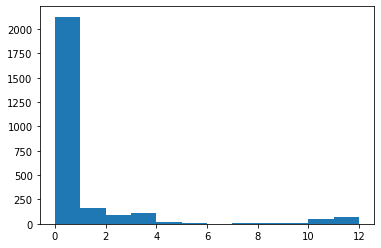

In [23]:

n, bins, patches = P.hist(clusterTotal,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12])
P.show()

In [22]:
len(clusterTotal)

2575

In [23]:
len(profilesVectors[0])

3

## to group back the data


In [24]:
totalIndex = 0
finalDic = {}
finalDic["HAD_RELATED"] = []
finalDic["POSITIVE_JOBS"] = []
finalDic["POSIBLE_JOBS"] = []
finalDic["TOTAL_JOBS"] = []
for profile in profilesVectors:
    lenP = len(profile)
    #print("total JOBs", lenP)
    totalPosJobs = 0
    possibleJobs = 0
    hadRealted = False
    ## se recorre el array de jobs para este perfil
    for jobI in range(0,lenP):
        job = profile[jobI]
        print(jobI,type(job) )
        if  type(job) == np.ndarray : 
            countSingleJob = clusterTotal[totalIndex]
            print(countSingleJob)
            possibleJobs+=1
            if countSingleJob>7:
                hadRealted = True
                totalPosJobs+=1
            totalIndex+=1
        else:
            totalIndex+=1
    finalDic["HAD_RELATED"].append(hadRealted)
    finalDic["POSITIVE_JOBS"].append(totalPosJobs)
    finalDic["POSIBLE_JOBS"].append(possibleJobs)
    finalDic["TOTAL_JOBS"].append(lenP)

print(len(clusterTotal),totalIndex,finalDic)


class 'NoneType'>
6 <class 'NoneType'>
0 <class 'NoneType'>
1 <class 'numpy.ndarray'>
3.0
2 <class 'NoneType'>
0 <class 'numpy.ndarray'>
1.0
1 <class 'numpy.ndarray'>
2.0
2 <class 'numpy.ndarray'>
3.0
3 <class 'NoneType'>
4 <class 'NoneType'>
5 <class 'NoneType'>
6 <class 'NoneType'>
7 <class 'NoneType'>
8 <class 'NoneType'>
9 <class 'NoneType'>
10 <class 'NoneType'>
11 <class 'NoneType'>
0 <class 'numpy.ndarray'>
1.0
1 <class 'NoneType'>
2 <class 'NoneType'>
3 <class 'NoneType'>
4 <class 'NoneType'>
5 <class 'NoneType'>
0 <class 'numpy.ndarray'>
2.0
1 <class 'NoneType'>
2 <class 'NoneType'>
0 <class 'NoneType'>
1 <class 'NoneType'>
0 <class 'numpy.ndarray'>
11.0
1 <class 'NoneType'>
2 <class 'NoneType'>
0 <class 'NoneType'>
1 <class 'NoneType'>
2 <class 'NoneType'>
3 <class 'NoneType'>
4 <class 'NoneType'>
5 <class 'NoneType'>
6 <class 'NoneType'>
0 <class 'NoneType'>
1 <class 'NoneType'>
0 <class 'numpy.ndarray'>
1.0
1 <class 'NoneType'>
2 <class 'NoneType'>
0 <class 'numpy.ndarray'>

In [26]:

JOB_HIST_CLUS_DF = pd.DataFrame(finalDic)
JOB_HIST_CLUS_DF.to_excel("count_history_index.xlsx",index=False)
print(JOB_HIST_CLUS_DF, JOB_HIST_CLUS_DF.shape)

     HAD_RELATED  POSITIVE_JOBS  POSIBLE_JOBS  TOTAL_JOBS
0          False              0             0           2
1          False              0             1           6
2          False              0             3          13
3          False              0             0           6
4          False              0             0           8
..           ...            ...           ...         ...
432         True              2             3           3
433         True              3             3           5
434         True              3             3           5
435        False              0             0           5
436         True              1             2           5

[437 rows x 4 columns] (437, 4)
